In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
import torch
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import requests
import os

In [15]:
class UltralyticsYOLOBrainTumor:
    """
    Official Ultralytics YOLOv11 for brain tumor detection
    99.56% accuracy reported in latest research
    """

    def __init__(self):
        self.model = None
        self.setup_model()

    def setup_model(self):
        """Setup YOLOv11 with brain tumor weights"""
        try:
            from ultralytics import YOLO

            # Option 1: Use official Ultralytics brain tumor model
            print("🔄 Loading YOLOv11 brain tumor model...")

            # Download official brain tumor model
            # This URL might be incorrect or not point to a valid model file.
            # You might need to replace this with the path to your trained model.
            model_path = '/content/datasets/runs/detect/train/weights/best.pt' # Assuming this is the trained model path

            if Path(model_path).exists():
                 self.model = YOLO(model_path)
                 print(f"✅ Loaded model from {model_path}")
            elif Path("brain_tumor_yolo11n.pt").exists(): # Keep this as a fallback if user has this file
                self.model = YOLO("brain_tumor_yolo11n.pt")
                print("✅ Loaded specialized brain tumor model")
            else:
                print("⚠️ Using base YOLOv11 - you'll need to fine-tune for brain tumors or provide a trained model")
                # Optionally load a base model if no trained model is found
                # self.model = YOLO("yolo11n.pt")


        except ImportError:
            print("❌ Ultralytics not installed. Install with: pip install ultralytics")


    def detect_brain_tumor(self, image_path, conf_threshold=0.5):
        """Detect brain tumors in MRI image"""
        if self.model is None:
            return {"error": "Model not loaded"}

        try:
            # Run inference
            results = self.model(image_path, conf=conf_threshold)

            # Parse results
            detections = []
            # Assuming results is a list of Result objects from self.model(image_path)
            for result in results:
                boxes = result.boxes
                if boxes is not None:
                    for box in boxes:
                        detection = {
                            "class": int(box.cls[0]),
                            "class_name": self.model.names[int(box.cls[0])],
                            "confidence": float(box.conf[0]),
                            "bbox": box.xyxy[0].tolist(),  # [x1, y1, x2, y2]
                            "center": [(box.xyxy[0][0] + box.xyxy[0][2])/2,
                                     (box.xyxy[0][1] + box.xyxy[0][3])/2]
                        }
                        detections.append(detection)

            # Store the raw results object for visualization
            self._latest_results = results

            return {
                "detections": detections,
                "num_tumors": len(detections),
                "image_path": image_path,
                "model": "YOLOv11-Brain-Tumor"
            }

        except Exception as e:
            return {"error": str(e)}

    def visualize_detections(self, image_path, detections):
        """Visualize brain tumor detections using Ultralytics methods"""
        if hasattr(self, '_latest_results') and self._latest_results:
            # Assuming the latest results correspond to the image_path
            # In a real application, you might want to match results to image_path more explicitly
            for i, result in enumerate(self._latest_results):
                 # You might want to save with a more specific filename if processing multiple images
                 save_filename = f"result_{Path(image_path).stem}_{i}.jpg"
                 result.show()  # display to screen
                 result.save(filename=save_filename)  # save to disk
                 print(f"✅ Saved visualization to {save_filename}")
        else:
            print("⚠️ No latest results found to visualize. Run detect_brain_tumor first.")

In [2]:
!mkdir -p datasets
!wget -P datasets https://github.com/ultralytics/assets/releases/download/v0.0.0/brain-tumor.zip

--2025-08-04 07:06:16--  https://github.com/ultralytics/assets/releases/download/v0.0.0/brain-tumor.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/521807533/f1b58ead-6918-4298-a494-edd15ea299c3?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-04T07%3A53%3A10Z&rscd=attachment%3B+filename%3Dbrain-tumor.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-04T06%3A52%3A57Z&ske=2025-08-04T07%3A53%3A10Z&sks=b&skv=2018-11-09&sig=BbpuK0OW1fjEUAYh3H7YMFfbqPHrTvTr5f56vC%2Bp8dw%3D&jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NDI5MTQ3NywibmJmIjoxNzU0MjkxMTc3LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvb

In [4]:
%cd datasets

/content/datasets


In [5]:
!unzip brain-tumor.zip

Archive:  brain-tumor.zip
   creating: images/
   creating: images/train/
  inflating: images/train/00054_145.jpg  
  inflating: images/train/00054_164.jpg  
  inflating: images/train/00056_110.jpg  
  inflating: images/train/00056_129.jpg  
  inflating: images/train/00056_147.jpg  
  inflating: images/train/00056_239.jpg  
  inflating: images/train/00056_92.jpg  
  inflating: images/train/00058_102.jpg  
  inflating: images/train/00058_122.jpg  
  inflating: images/train/00058_141.jpg  
  inflating: images/train/00058_179.jpg  
  inflating: images/train/00059_103.jpg  
  inflating: images/train/00059_122.jpg  
  inflating: images/train/00059_141.jpg  
  inflating: images/train/00059_84.jpg  
  inflating: images/train/00060_69.jpg  
  inflating: images/train/00060_70.jpg  
  inflating: images/train/00060_71.jpg  
  inflating: images/train/00060_72.jpg  
  inflating: images/train/00061_108.jpg  
  inflating: images/train/00061_127.jpg  
  inflating: images/train/00061_146.jpg  
  inflat

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11m.pt")  # pretrained YOLO11n model

# Train the model
results = model.train(data="/content/datasets/brain-tumor.yaml", epochs=100, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/brain-tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

 16                  -1  1    542720  ultralytics.nn.modules.block.C3k2            [1024, 256, 1, True]          
 17                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 20                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 22                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 23        [16, 19, 22]  1   1412566  ultralytics.nn.modules.head.Detect           [2, [256, 512, 512]]          
YOLO11m summary: 231 layers, 20,054,550 parameters, 20,054,534 gradients, 68.2 GFLOPs

T

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 193.8±91.7 MB/s, size: 3.7 KB)


train: Scanning /content/datasets/labels/train... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<00:00, 2233.25it/s]


train: New cache created: /content/datasets/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 87.5±73.7 MB/s, size: 3.4 KB)


val: Scanning /content/datasets/labels/val... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<00:00, 878.60it/s]

val: New cache created: /content/datasets/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.98G      1.473      2.938      1.303         20        640: 100%|██████████| 56/56 [00:32<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        223        241      0.239      0.537      0.217      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.19G      1.394      1.734      1.254         28        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        223        241      0.279      0.657      0.303      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.24G      1.436      1.615      1.278         20        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        223        241      0.472      0.257      0.216      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.24G      1.333       1.59      1.234         19        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241     0.0924      0.303     0.0435     0.0216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.23G      1.339      1.486      1.244         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        223        241      0.419       0.38      0.294      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.23G       1.29      1.444      1.218         13        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        223        241      0.385      0.692       0.41       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.22G      1.275      1.386      1.202         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        223        241       0.41      0.653      0.417      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.23G      1.233      1.374      1.172         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        223        241      0.396      0.645      0.387      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.23G      1.219      1.361      1.173         24        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.425      0.685      0.438      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.23G      1.192      1.304      1.153         22        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.442      0.753       0.47      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.24G      1.176      1.288      1.155         22        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        223        241      0.443      0.673      0.432      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.22G      1.159      1.292      1.147         18        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        223        241      0.375      0.512      0.395      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.24G      1.133      1.266      1.131         15        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.429      0.646      0.435      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.23G       1.17      1.265      1.141         18        640: 100%|██████████| 56/56 [00:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.464      0.807      0.489      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.22G      1.137       1.23      1.133         24        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        223        241       0.44      0.803      0.488      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.23G      1.116      1.223      1.102         11        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        223        241      0.425      0.661      0.408      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.23G      1.079      1.209      1.103         31        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.444      0.653      0.449      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.22G      1.119      1.193      1.124         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.447      0.795      0.484      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.24G      1.086      1.184      1.121         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        223        241       0.46      0.791      0.499      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.24G       1.09      1.175       1.09         19        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.433        0.8      0.468      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.24G      1.131      1.215      1.133         15        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.429      0.723      0.442      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.23G      1.015      1.144      1.073         25        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        223        241      0.429      0.814      0.455      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.23G      1.053      1.155      1.094         18        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        223        241      0.463      0.772      0.502      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.23G      1.008      1.121      1.063         20        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        223        241      0.438      0.766      0.453        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.23G      1.054      1.148      1.094         20        640: 100%|██████████| 56/56 [00:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        223        241      0.443      0.746      0.456      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.22G      1.026      1.144      1.082         21        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        223        241      0.456      0.802      0.461      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.24G      1.042      1.148      1.082         19        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        223        241        0.4      0.813      0.432      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.23G      1.027      1.142      1.075         22        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        223        241      0.441       0.81      0.465      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.23G      1.016      1.102      1.063         15        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        223        241       0.43       0.77      0.452      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.23G     0.9979      1.111      1.071         24        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        223        241      0.457      0.842      0.486      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.23G       1.04      1.125      1.071         21        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.469      0.835      0.514      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.23G      1.012      1.104      1.065         25        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.459      0.821      0.488      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.23G       1.01      1.122       1.07         25        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        223        241      0.465       0.73      0.483      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.23G     0.9962      1.107      1.073         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        223        241      0.453      0.781      0.477      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.22G      0.988      1.079      1.057         29        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.429      0.879      0.455      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.23G     0.9797      1.097      1.048         18        640: 100%|██████████| 56/56 [00:31<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        223        241      0.454      0.801      0.471      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.23G      1.006      1.094       1.06         20        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        223        241      0.461      0.837      0.506      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.23G     0.9739      1.083      1.052         16        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241       0.45      0.836      0.488      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.24G      0.965      1.062      1.041         25        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.432      0.842      0.478      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.24G     0.9544      1.049      1.047         22        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        223        241      0.445      0.829      0.465      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.23G     0.9432      1.039      1.031         21        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        223        241      0.453      0.837      0.471      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.23G     0.9532      1.089      1.037         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.446      0.764      0.473      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.23G     0.9511      1.059       1.04         19        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.449      0.881      0.457      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.23G      0.941      1.026      1.049         14        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        223        241      0.424      0.824      0.446      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.22G     0.9429      1.019      1.049         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        223        241      0.437      0.829      0.476      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.23G     0.9508      1.056      1.053         24        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.459      0.761      0.463      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.23G      0.944      1.023      1.045         27        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.434      0.833      0.445      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.23G     0.9163      1.006      1.012         22        640: 100%|██████████| 56/56 [00:30<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        223        241      0.444      0.868        0.5      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.23G     0.9154     0.9749      1.015         15        640: 100%|██████████| 56/56 [00:30<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.444      0.792      0.481      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.23G     0.9465     0.9977      1.039         20        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.454      0.806      0.485      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.23G     0.9223      1.007      1.027         17        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        223        241      0.463      0.802      0.483      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.23G     0.8979     0.9892      1.011         17        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        223        241      0.432      0.858      0.451      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.23G      0.898     0.9542      1.008         22        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.451      0.828      0.508       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.23G      0.912     0.9354      1.023         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.399      0.812      0.406       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.23G     0.9091      0.964      1.005         22        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        223        241       0.45      0.825      0.453      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.24G     0.9202     0.9528      1.023         21        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.423       0.84      0.452      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.23G     0.9197     0.9504      1.023         19        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.437      0.858      0.463      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.24G     0.8944     0.9491      1.009         18        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.451      0.842      0.522      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.23G     0.8623     0.9096     0.9903         21        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        223        241      0.449      0.842      0.458      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.24G     0.8711     0.9262     0.9975         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.439      0.835      0.463      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.22G     0.8847     0.9164       1.01         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        223        241       0.47      0.771       0.48       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.24G     0.8858     0.9174      1.001         16        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        223        241      0.469      0.779      0.478      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.23G     0.8834     0.8912     0.9938         24        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        223        241      0.433      0.853      0.473       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.22G     0.8415     0.8626     0.9864         14        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.437      0.831      0.494      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.24G     0.8459     0.8794     0.9835         19        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.425      0.887      0.449      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.23G     0.8388     0.8622     0.9967         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        223        241      0.465      0.812      0.519      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.22G     0.8513     0.8444     0.9834         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.444       0.79      0.462      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.22G     0.8248     0.8276     0.9789         16        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.461      0.804      0.485      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.24G     0.8252     0.8051       0.98         24        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        223        241      0.434      0.827       0.45      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.24G     0.8627     0.8263     0.9932         16        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        223        241      0.445      0.801      0.442      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.23G     0.8228     0.8084     0.9744         24        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.461      0.799      0.498      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.23G     0.8214     0.8244     0.9746         20        640: 100%|██████████| 56/56 [00:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        223        241      0.442      0.831      0.483      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.23G     0.8075     0.7981     0.9681         15        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        223        241      0.433      0.835      0.486      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.22G     0.8301     0.7713     0.9802         16        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        223        241      0.433      0.843      0.454      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.24G     0.8379      0.772      0.989         16        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.428      0.861      0.487      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.23G      0.794     0.7545     0.9618         26        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241       0.46      0.774      0.477      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.24G     0.8345     0.7504     0.9761         15        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        223        241       0.41      0.825      0.467      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.23G     0.8008     0.7555       0.97         25        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        223        241      0.455      0.809       0.48      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.22G     0.8058     0.7346     0.9703         18        640: 100%|██████████| 56/56 [00:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        223        241       0.45      0.774      0.492      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.22G     0.7976      0.716     0.9635         29        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        223        241      0.429      0.855      0.476      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.23G     0.7743      0.713      0.951         23        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        223        241      0.418      0.717      0.447      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.24G     0.7934     0.7015     0.9561         20        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.428      0.802      0.458      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.23G     0.7778      0.716     0.9671         17        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.438      0.826      0.462      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.24G     0.7657     0.6553      0.953         22        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        223        241      0.433      0.833       0.47      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.22G     0.7538     0.6697     0.9432         24        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        223        241       0.45      0.806      0.482      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.23G     0.7344     0.6299     0.9376         20        640: 100%|██████████| 56/56 [00:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.439      0.776      0.487      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.22G     0.7572     0.6629     0.9498         21        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        223        241       0.45      0.814      0.484      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.23G     0.7385     0.6511     0.9409         18        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        223        241      0.444      0.802      0.472      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.23G     0.7583     0.6054     0.9499         24        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        223        241      0.431      0.814      0.453      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.23G     0.7464     0.6252     0.9382         20        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        223        241      0.451      0.815      0.478      0.345


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.23G     0.7101     0.5859     0.9203         13        640: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        223        241      0.416      0.791      0.451      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.24G     0.6905     0.5638     0.9181         16        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        223        241      0.424      0.796      0.464      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.24G     0.6617     0.5171     0.9016         14        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.436       0.81      0.459      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.23G     0.6554     0.4946     0.9024         12        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        223        241      0.412      0.771      0.426       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.22G     0.6673     0.5002     0.9077         13        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        223        241      0.433      0.775      0.464      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.23G     0.6538     0.4775     0.9027         13        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        223        241      0.448      0.805      0.484      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.23G     0.6404     0.4767     0.8996         12        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        223        241      0.423      0.785       0.45      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.24G     0.6423     0.4636     0.9021         15        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        223        241      0.429      0.745      0.451      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.23G     0.6342     0.4397     0.8972         13        640: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        223        241      0.424       0.76      0.438      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.23G     0.6111     0.4394      0.882         14        640: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        223        241      0.432       0.77      0.445      0.325



100 epochs completed in 0.978 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]


                   all        223        241       0.47      0.799      0.519      0.378
              negative        142        154      0.594      0.747      0.616      0.451
              positive         81         87      0.346      0.851      0.423      0.306
Speed: 0.3ms preprocess, 10.8ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train



0: 640x640 1 positive, 35.0ms
1: 640x640 1 negative, 35.0ms
Speed: 3.3ms preprocess, 35.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


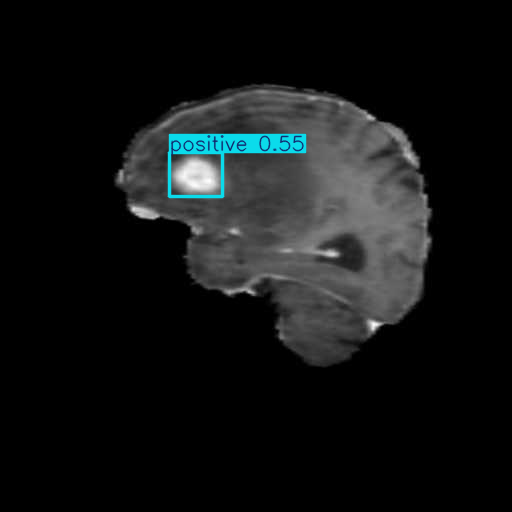

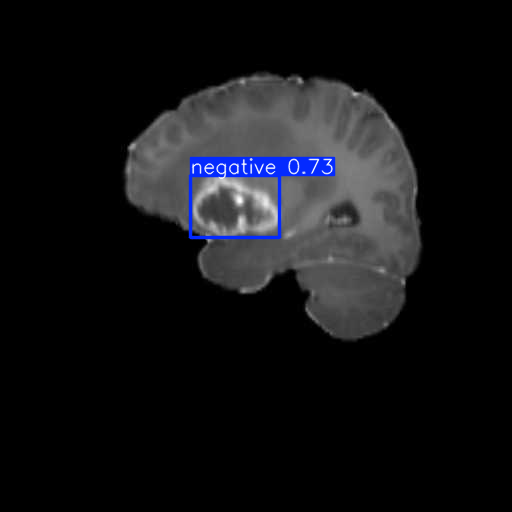

In [8]:
# Run batched inference on a list of images
results = model(["/content/datasets/images/train/00077_246.jpg", "/content/images/train/00059_122.jpg"])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

🔄 Loading YOLOv11 brain tumor model...
✅ Loaded model from /content/datasets/runs/detect/train/weights/best.pt

image 1/1 /content/datasets/images/train/00077_246.jpg: 640x640 1 positive, 36.8ms
Speed: 3.2ms preprocess, 36.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

Detection Results:
{'detections': [{'class': 1, 'class_name': 'positive', 'confidence': 0.5452492833137512, 'bbox': [169.39126586914062, 152.52317810058594, 222.31558227539062, 196.22634887695312], 'center': [tensor(195.8534, device='cuda:0'), tensor(174.3748, device='cuda:0')]}], 'num_tumors': 1, 'image_path': '/content/datasets/images/train/00077_246.jpg', 'model': 'YOLOv11-Brain-Tumor'}


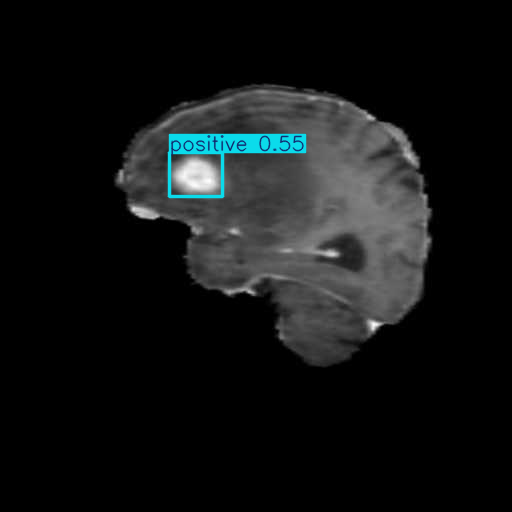

✅ Saved visualization to result_00077_246_0.jpg


In [16]:
from pathlib import Path
import requests
import os
import cv2
import matplotlib.pyplot as plt


# Instantiate the class
brain_tumor_detector = UltralyticsYOLOBrainTumor()

# Download an example MRI image (replace with your image path)
image_filename = "/content/datasets/images/train/00077_246.jpg"


# Make a prediction
if Path(image_filename).exists():
    detection_results = brain_tumor_detector.detect_brain_tumor(image_filename)

    # Print the results
    print("\nDetection Results:")
    print(detection_results)

    # Visualize the results (optional)
    if detection_results and "detections" in detection_results and detection_results["detections"]:
        brain_tumor_detector.visualize_detections(image_filename, detection_results["detections"])
    elif detection_results and "detections" in detection_results and not detection_results["detections"]:
        print("✅ No tumors detected in the image.")
    else:
        print("❌ Could not perform detection.")

else:
    print("❌ Image file not found, skipping detection.")